## 广告点击率预测
这个项目的主要的目的是通过给定的广告信息和用户信息来预测一个广告被点击与否。 如果广告有很大概率被点击就展示广告，如果概率低，就不展示。 因为如果广告没有被点击，对双方（广告主、平台）来讲都没有好处。所以预测这个概率非常重要，也是此项目的目标。

在这个项目中，你需要完成以下的任务：
- ``数据的读取和理解``: 把给定的.csv文件读入到内存，并通过pandas做数据方面的统计以及可视化来更深入地理解数据。
- ``特征构造``: 从原始特征中衍生出一些新的特征，这部分在机器学习领域也是很重要的工作。
- ``特征的转化``: 特征一般分为连续型(continuous)和类别型（categorical), 需要分别做不同的处理。
- ``特征选择``: 从已有的特征中选择合适的特征，这部分也是很多项目中必不可少的部分。 
- ``模型训练与评估``: 通过交叉验证方式来训练模型，这里需要涉及到网格搜索等技术。


你需要完成标记为`TODO`的部分。 

另外，提交作业时候的注意点：
> 1. 不要试图去创建另外一个.ipynb文件，所有的程序需要在`starter_code.ipynb`里面实现。很多的模块已经帮你写好，不要试图去修改已经定义好的函数以及名字。 当然，自己可以按需求来创建新的函数。但一定要按照给定的框架来写程序，不然判作业的时候会出现很多问题。 
> 2. 上传作业的时候把整个文件解压成.zip文件（不要.rar格式），请不要上传图片文件和数据文件，其他的都需要上传包括`README.md`。
> 3. 确保程序能够正常运行，我们支持的环境是`Python 3`,  千万不要使用`Python 2`
> 4. 上传前一定要确保完整性，批改过一次的作业我们不会再重新批改，会作为最终的分数来对待。 
> 5. 作业可以讨论，但请自己完成。让我们一起遵守贪心学院的`honor code`。

好了，我们开始吧！

> ``在提交的.zip文件中请不要包含train.csv文件！！！``

### 1. 数据读取和理解
对于``.CSV``的文件，我们一般使用``pandas``工具来读取，读取之后的数据会存放在``dataframe``中。在此项目中，我们使用的是``kaggle``的一个竞赛数据，具体官网地址为：https://www.kaggle.com/c/avazu-ctr-prediction 。 训练和测试数据分别为``train.csv``和``test.csv``。 官网提供的数据比较大，压缩之后的已经达到1G以上。 为了确保让所有人可以在本机上无障碍去调模型，在此项目中，我们特意去采样了一部分数据。 采样的规则为：从``train.csv``文件中读取头``400000``个样本，并重命名为``train_subset.csv``。 之后在这个数据的基础上我们会进一步分为训练集和测试集。所以解压完.zip文件后会发现只有一个``train_subset.csv``文件。 

项目中请``务必要使用``我们提供的样本(当然，你感兴趣也可以在原始样本里尝试，但提交作业时代码一定要基于我们给定的）。 这里给一个小提示： 如果你想在某一个``.csv``文件中只提取头``1000``个样本，在``linux``或者``os``下可以使用如下命令：``head -n1000 train.csv > train_subset.csv``, 意思就是从``train.csv``中提取头``1000``个样本，并存放在``train_subset.csv``中。 为了以后更好的做数据方面的处理，这些基本的命令建议大家都掌握一下。

#### 学习资料推荐 ####
- 如果对``pandas``比较生疏，或者之前没有使用过，请耐心看这份文档，帮助你马上上手：https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html  
- 如果对``numpy``比较生疏，或者之前没有接触过，请耐心看这两份文档，很实用： http://jalammar.github.io/visual-numpy/         http://cs231n.github.io/python-numpy-tutorial/ 

这些文档足够让你上手``numpy``和``pandas``

### 1.1 数据的读取

In [1]:
!wc -l train_subset.csv

  400000 train_subset.csv


In [2]:
# 导入基本的库，每个项目的必备
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置matplotlib的模式
%matplotlib inline

# 设置matplot的样式
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
# 通过pandas读取.csv文件，并展示头几个样本。
data_df = pd.read_csv('train_subset.csv')
data_df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [47]:
data_df.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,3.999990e+05,399999.000000,3.999990e+05,399999.000000,399999.000000,399999.000000,399999.000000,399999.000000,399999.000000,399999.000000,399999.000000,399999.000000,399999.000000,399999.000000,399999.000000
mean,9.614780e+18,0.165890,1.410210e+07,1005.022768,0.214473,1.038970,0.220948,18142.652549,319.075768,56.658307,2024.814760,1.035993,194.103383,41664.098583,76.475146
std,5.549223e+18,0.371983,8.078554e-01,0.944523,0.437207,0.502755,0.666128,3315.611574,20.281384,36.368963,412.512425,1.259798,271.636693,49341.562047,41.974829
min,9.984920e+12,0.000000,1.410210e+07,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,13.000000
25%,4.233835e+18,0.000000,1.410210e+07,1005.000000,0.000000,1.000000,0.000000,15706.000000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,48.000000
50%,1.049204e+19,0.000000,1.410210e+07,1005.000000,0.000000,1.000000,0.000000,18993.000000,320.000000,50.000000,2161.000000,0.000000,39.000000,-1.000000,79.000000
75%,1.445999e+19,0.000000,1.410210e+07,1005.000000,0.000000,1.000000,0.000000,20596.000000,320.000000,50.000000,2333.000000,2.000000,297.000000,100084.000000,79.000000
max,1.844670e+19,1.000000,1.410210e+07,1010.000000,7.000000,5.000000,5.000000,21705.000000,1024.000000,768.000000,2497.000000,3.000000,1835.000000,100248.000000,195.000000


> ``问题1（TODO）：`` 在上面的数据中有一个特征叫作``hour``, 是时间的特征，但这个值有些看不懂... 这部分需要通过pandas来做处理。把这个数转换成具体时间的格式。请把这个特征格式化成``%y%m%d%H``形式。格式化完之后请覆盖掉原来的特征。提示： 使用 ``pd.to_datetime``函数，然后指定需要格式化的特征和格式化的样式。 

In [48]:
# TODO 把hour特征格式化成 '%y%m%d%H'形式。
data_df['hour'] = pd.to_datetime(data_df['hour'], format = "%y%m%d%H" )

In [49]:
# 重新打印一下是否有改变
data_df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [50]:
data_df.hour.value_counts()

2014-10-21 02:00:00    143551
2014-10-21 01:00:00    137442
2014-10-21 00:00:00    119006
Name: hour, dtype: int64

In [51]:
data_df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [52]:
# 由于特征个数比较多，有些特征被隐藏掉了（表示成了...)， 为了把所有特征全部看到，可以分两次来展示：
data_df.iloc[:, :12].head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id
0,1.000009e+18,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a
1,1.000017e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a
2,1.000037e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a
3,1.000064e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a
4,1.000068e+19,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a


In [53]:
data_df.iloc[:, 12:].head()

,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157


从上述数据中，你会发现大量的特征为类别型特征，而且很多特征已经被编码成看不懂的字符串（这些都是为了不公开用户数据），但即便如此，我们也可以把它们直接看成是类别型特征（categorical featuer）。

In [54]:
# 查看一下每一个特征的类型以及是否存在null
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399999 entries, 0 to 399998
Data columns (total 24 columns):
id                  399999 non-null float64
click               399999 non-null int64
hour                399999 non-null datetime64[ns]
C1                  399999 non-null int64
banner_pos          399999 non-null int64
site_id             399999 non-null object
site_domain         399999 non-null object
site_category       399999 non-null object
app_id              399999 non-null object
app_domain          399999 non-null object
app_category        399999 non-null object
device_id           399999 non-null object
device_ip           399999 non-null object
device_model        399999 non-null object
device_type         399999 non-null int64
device_conn_type    399999 non-null int64
C14                 399999 non-null int64
C15                 399999 non-null int64
C16                 399999 non-null int64
C17                 399999 non-null int64
C18                 399999 no

### 1.2 数据的理解

#### ``id``特征 ####
我们是否需要这个特征？ 应该如何判断？ 如果发现不需要此特征就可以从data_df中删掉了。
> ``问题2（TODO）`` 1. 请判断这个特征有没有价值  2. 如果没有价值就把它从data_df中删掉。 提示： 如果对于每一个样本，``id``都是不一样的，那显然是无用的特征。

In [55]:
data_df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [56]:
# TODO： 请实现上述的逻辑
unique_count={}
for i in data_df.columns:
    unique_count[i]=len(data_df[i].unique())
print (unique_count)
deleted_list=[]
for j in unique_count.keys():
    if unique_count[j]==len(data_df):
        deleted_list.append(j)
print ('variable that will be deleted:', deleted_list)

{'id': 399999, 'click': 2, 'hour': 3, 'C1': 6, 'banner_pos': 6, 'site_id': 1588, 'site_domain': 1464, 'site_category': 21, 'app_id': 1450, 'app_domain': 102, 'app_category': 19, 'device_id': 33226, 'device_ip': 141109, 'device_model': 3757, 'device_type': 4, 'device_conn_type': 4, 'C14': 520, 'C15': 6, 'C16': 7, 'C17': 149, 'C18': 4, 'C19': 40, 'C20': 152, 'C21': 33}
variable that will be deleted: ['id']


In [57]:
for j in deleted_list:
    del data_df[j]
print (data_df.columns)

Index(['click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')


#### ``click``标签(label) ####
对标签分布的理解是必不可少的，因为这直接跟样本不平衡相关。
> ``问题3（TODO）``: 对于``data_df``, 请输出正样本和负样本各自的比例。

In [58]:
# TODO： 输出正样本的负样本各自的比例
print (data_df.click.value_counts(0))
print (data_df.click.value_counts(1))

0    333643
1     66356
Name: click, dtype: int64
0    0.83411
1    0.16589
Name: click, dtype: float64


通过上述的数据，可以很容易看出被点击的次数要远小于没有被点击的次数。所以这个数据是不平衡的数据。但这个不平衡还没有那么严重。其实不平衡严重时，负样本和正样本比例有可能1000：1， 甚至更悬殊。 由于样本的不平衡，使用准确率是不明智的，所以评估指标我们选用``F1-score``. 如果对这部分不熟，请看第7章的视频。 

#### ``hour``特征 ####
时间特征有可能对我们帮助，比如是否凌晨点击率要低于早上的，是否早上的要低于下午的？ 从直观上理解其实是有帮助的。 但由于在这个项目中，我们只提取了前40万个样本，有可能时间上的差别不大（我们要知道一个大的平台，仅仅1分钟就可以收集到数十万到几百万以上的样本）。 但是，不管怎样，打印一下``hour``特征相关的信息看看：

In [59]:
data_df.hour.describe()

count                  399999
unique                      3
top       2014-10-21 02:00:00
freq                   143551
first     2014-10-21 00:00:00
last      2014-10-21 02:00:00
Name: hour, dtype: object

In [60]:
data_df.hour.value_counts()

2014-10-21 02:00:00    143551
2014-10-21 01:00:00    137442
2014-10-21 00:00:00    119006
Name: hour, dtype: int64

其实从上述的结果中可以看到，时间的区间为10-21的00点到10-21的02点，也就是2个小时的间隔。所以在使用这个特征的时候，可以把小时的特征提取出来，因为日期都是一样的（这部分没价值）。 

#### ``banner_pos``特征 ####
这是广告投放的位置，从直观上来看对广告点击的结果影响比较大，所以做一下可视化的分析并更好地理解这个特征。首先来看一下``banner_pos``的取值范围。 

In [61]:
data_df['banner_pos'].unique()

array([0, 1, 4, 5, 2, 7])

从这个结果里可以看出，它的范围是0-7， 但中间不包含3和6， 有可能是我们的训练数据不全。 对于这些数据请不要理所当然地理解为它表示的是具体的位置信息，比如1代表最前面的位置... 因为我们也不知道它的编码规则是怎么样的。但不管怎样，我们可以通过可视化方式来大概了解一下每一个位置对点击率的影响。 

> ``问题4（TODO）``: 通过可视化方式来展示每一个位置上的样本总数以及其中被点击和没有被点击的样本个数。需要得到如下的这样的一幅图：
<img src="sample_img1.png" alt="drawing" width="300"/>

In [62]:
#get the dataset for plot
plot_df=data_df.groupby(['banner_pos']).click.value_counts().to_frame(name="count").reset_index()
plot_df

,banner_pos,click,count
0,0,0,266217
1,0,1,49810
2,1,0,66955
3,1,1,16484
4,2,0,110
5,2,1,12
6,4,0,13
7,4,1,2
8,5,0,318
9,5,1,45


0    0
1    1
Name: click, dtype: int64


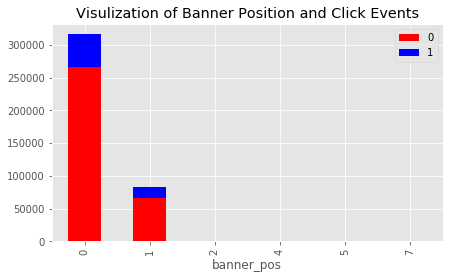

In [63]:
# TODO: 输出类似于上述这幅图
colors=['red','blue']
fig, ax = plt.subplots(figsize=(7,4))  
click = plot_df['click'].drop_duplicates()
print (click)
margin_bottom = np.zeros(len(plot_df['banner_pos'].drop_duplicates()))
#print (margin_bottom)
for num, j in enumerate(click):
    #print (num, j)
    values = list(plot_df[plot_df['click'] == j].loc[:, 'count'])
    #print (values)
    plot_df[plot_df['click'] == j].plot.bar(x='banner_pos',y='count', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=j)
    margin_bottom += values
plt.title("Visulization of Banner Position and Click Events")
plt.show()

> ``问题5（TODO)``： 生成完上面的图之后能感觉到这个特征还是蛮重要的，而且由于``banner_pos=2,4,5,7``的样本比较少，在图里不那么直观。所以我们就尝试打印一下一个表格。表格里的每一行针对于的是banner_pos具体的值，另外表格有两列，分别是false和true,  分别代表在某一个banner_pos的样本，有百分之多少的概率不被点击和被点击。 生成出来的表格如下图所示：
<img src="sample_img2.png" alt="drawing" width="200"/>


In [64]:
# TODO: 生成如上面的表格
table1=plot_df.pivot(index='banner_pos',columns='click', values='count').reset_index().set_index('banner_pos')
table1['Total']=table1[0]+table1[1]
table2 = table1.div( table1.iloc[:,-1], axis=0 )
del table2['Total']
table2

click,0,1
banner_pos,,
0,0.842387,0.157613
1,0.802443,0.197557
2,0.901639,0.098361
4,0.866667,0.133333
5,0.876033,0.123967
7,0.909091,0.090909


#### ``site``相关特征 ####

In [65]:
site_features = ['site_id', 'site_domain', 'site_category']
data_df[site_features].describe()

,site_id,site_domain,site_category
count,399999,399999,399999
unique,1588,1464,21
top,85f751fd,c4e18dd6,50e219e0
freq,117380,122016,129039


In [66]:
app_features = ['app_id', 'app_domain', 'app_category']
data_df[app_features].describe()

,app_id,app_domain,app_category
count,399999,399999,399999
unique,1450,102,19
top,ecad2386,7801e8d9,07d7df22
freq,282619,298152,284444


> ``问题6（TODO）``:这里重点研究一下，``app_category``特征，看是否跟标签有比较强的关系。 为了理解这一点，对于每一种类型的``app_category``值，请画出``histogram``，展示每一种取值条件下样本被点击或者没有被点击的概率。效果图如下：
<img src="sample_img3.png" alt="drawing" width="300"/>


dataset for the plot: 
   app_category  click  pct_values
0      07d7df22      0    0.803026
1      07d7df22      1    0.196974
2      09481d60      0    0.878049
3      09481d60      1    0.121951
4      0f2161f8      0    0.907216
5      0f2161f8      1    0.092784
6      0f9a328c      0    0.933333
7      0f9a328c      1    0.066667
8      4681bb9d      0    0.958333
9      4681bb9d      1    0.041667
10     4ce2e9fc      0    0.964706
11     4ce2e9fc      1    0.035294
12     7113d72a      0    0.923077
13     7113d72a      1    0.076923
14     75d80bbe      0    0.928161
15     75d80bbe      1    0.071839
16     879c24eb      0    0.909091
17     879c24eb      1    0.090909
18     8ded1f7a      0    0.938421
19     8ded1f7a      1    0.061579
20     8df2e842      0    0.600000
21     8df2e842      1    0.400000
22     a3c42688      0    0.980583
23     a3c42688      1    0.019417
24     a7fd01ec      0    1.000000
25     a7fd01ec      1    0.000000
26     a86a3e89      0    0.9411

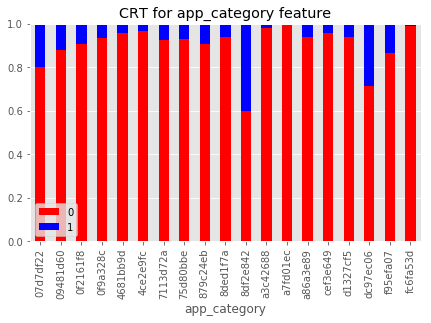

In [67]:
# TODO: 画出如上这幅图。
import seaborn as sns
def plot_stack_bar_chart(df, y_var, x_var):
    """
    prepare the dataset for plotting

    """
    plot_df=df.groupby([x_var])[y_var].value_counts().to_frame(name="count").reset_index()
    table1=plot_df.pivot(index=x_var,columns=y_var, values='count').reset_index().set_index(x_var).fillna(0)
    table1['Total']=table1[0]+table1[1]
    table2 = table1.div( table1.iloc[:,-1], axis=0 ).reset_index()
    del table2['Total']
    #print (table2)
    plot_df= (table2.set_index([x_var])
         .stack()
         .reset_index(name='pct_values')
         .rename(columns={'level_2':y_var}))
    print ('dataset for the plot: ')
    print (plot_df)

    fig, ax = plt.subplots(figsize=(7,4))  
    y_values= plot_df[y_var].drop_duplicates()
    margin_bottom = np.zeros(len(plot_df[x_var].drop_duplicates()))
    #print (margin_bottom)
    #print (y_values,margin_bottom)
    for num, j in enumerate(y_values):
        #print (num, j)
        values = list(plot_df[plot_df[y_var] == j].loc[:, 'pct_values'])
        #print ('values', values)
        plot_df[plot_df[y_var] == j].plot.bar(x=x_var,y='pct_values', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=j)
        margin_bottom += values
        #print ('margin_bottom ', margin_bottom)
        
    plot_title='CRT for ' + x_var + ' feature'
    plt.title(plot_title)
    plt.show()
    
#plot_stack_bar_chart(plot_df, 'click', 'banner_pos', 'count')
plot_stack_bar_chart(data_df, 'click', 'app_category')

####  ``device``相关的特征 ####
查看跟device相关的特征信息

In [68]:
device_features = ['device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type']
data_df[device_features].astype('object').describe()

,device_id,device_ip,device_model,device_type,device_conn_type
count,399999,399999,399999,399999,399999
unique,33226,141109,3757,4,4
top,a99f214a,6b9769f2,8a4875bd,1,0
freq,337979,2747,26552,377567,358831


> ``问题7(TODO)``: 对于不同的``device_conn_type``, 画一个histogram，并表示在不同type的情况下被点击和没有被点击的概率。效果图跟上面的问题（问题6）类似。

dataset for the plot: 
   device_conn_type  click  pct_values
0                 0      0    0.829137
1                 0      1    0.170863
2                 2      0    0.870964
3                 2      1    0.129036
4                 3      0    0.917838
5                 3      1    0.082162
6                 5      0    0.966197
7                 5      1    0.033803


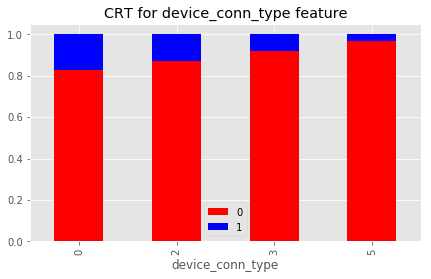

In [69]:
# TODO： 画出device_conn_type和CTR相关的histogram, 参考问题6的效果图。
plot_stack_bar_chart(data_df, 'click', 'device_conn_type' )

#### ``C1, C14-C21`` 特征####
这些特征没有具体被标记到底是什么意思，有可能是涉及到公司的隐私。 当然，理解一个特征的含义其实挺重要的，但对于这个问题没办法，毕竟他们没有提供描述。但无论如何，也可以通过可视化分析去理解这些特征是否影响点击率。

In [70]:
c_features = ['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
data_df[c_features].astype('object').describe()

,C1,C14,C15,C16,C17,C18,C19,C20,C21
count,399999,399999,399999,399999,399999,399999,399999,399999,399999
unique,6,520,6,7,149,4,40,152,33
top,1005,21647,320,50,1722,0,35,-1,79
freq,376760,40254,380863,382421,125595,218396,192931,233501,125595


> ``问题8（TODO）``： 请画出C1和点击率之间的关系。请参考问题6的样例图。 

dataset for the plot: 
      C1  click  pct_values
0   1001      0    0.924528
1   1001      1    0.075472
2   1002      0    0.779586
3   1002      1    0.220414
4   1005      0    0.833459
5   1005      1    0.166541
6   1007      0    0.982097
7   1007      1    0.017903
8   1008      0    0.876033
9   1008      1    0.123967
10  1010      0    0.928396
11  1010      1    0.071604


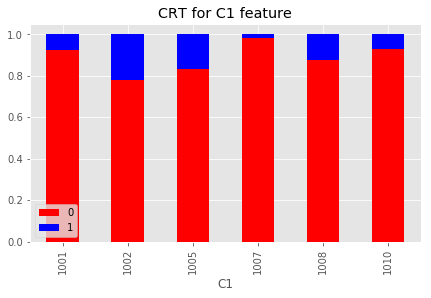

In [71]:
# TODO: 画如上所要求的图
plot_stack_bar_chart(data_df, 'click', 'C1')

### 2. 特征的构造
特征构造对于一个机器学习建模非常重要。它的意思就是基于原有给定的特征基础上构造一些新的特征。构造特征的方法有很多： 1. 在原有的特征基础上做一些转换从而提取特征 2. 不同特征之间利用常规的运算来构造更复杂的特征（比如有特征f1, f2, 则可以通过f1 * f2操作生成新的特征)。
对于特征的构造在之后的项目中会有更详细的介绍，在这里，我们就简单的体验一下。 

首先，我们来看一下数据集里的``hour``字段.

In [72]:
data_df['hour']

0        2014-10-21 00:00:00
1        2014-10-21 00:00:00
2        2014-10-21 00:00:00
3        2014-10-21 00:00:00
4        2014-10-21 00:00:00
5        2014-10-21 00:00:00
6        2014-10-21 00:00:00
7        2014-10-21 00:00:00
8        2014-10-21 00:00:00
9        2014-10-21 00:00:00
10       2014-10-21 00:00:00
11       2014-10-21 00:00:00
12       2014-10-21 00:00:00
13       2014-10-21 00:00:00
14       2014-10-21 00:00:00
15       2014-10-21 00:00:00
16       2014-10-21 00:00:00
17       2014-10-21 00:00:00
18       2014-10-21 00:00:00
19       2014-10-21 00:00:00
20       2014-10-21 00:00:00
21       2014-10-21 00:00:00
22       2014-10-21 00:00:00
23       2014-10-21 00:00:00
24       2014-10-21 00:00:00
25       2014-10-21 00:00:00
26       2014-10-21 00:00:00
27       2014-10-21 00:00:00
28       2014-10-21 00:00:00
29       2014-10-21 00:00:00
                 ...        
399969   2014-10-21 02:00:00
399970   2014-10-21 02:00:00
399971   2014-10-21 02:00:00
399972   2014-

由于我们的数据只是做了部分采样，所以对于所有的样本日期是一致的。唯一不一样的是具体的时间。时间从10-21 00点到 10-21 02点，总共3个不同的时间段来记录。

> ``问题9（TODO）``: 把``hour``这个字段转换成离散型变量，分别是0，1，2。 也就是2014-10-21 00点对应到0， 2014-10-21 01点对应到1， 2014-10-21 02点对应到2. 并把原来的``hour``字段替换一下。

In [73]:
# TODO:  实现问题9
data_df['hour']=data_df['hour'].dt.hour
print (data_df['hour'].value_counts())

2    143551
1    137442
0    119006
Name: hour, dtype: int64


### 3. 特征转化
在上述数据中，存在着大量的类别型特征(categorical feature), 这部分的特征我们需要转换成独热编码的形式（one-hot encoding)，如果对这部分不熟悉，请参考之前的视频课程。 比如”男”，“女”这个特征分别转换成(0, 1), (1, 0)这种形式。 

In [74]:
# 由于这两个特征的稀疏性，从特征库中去掉。 但如果计算资源允许，可以加入进来。 
data_df.drop('device_id', axis=1, inplace=True)
data_df.drop('device_ip', axis=1, inplace=True)
data_df.drop('device_model', axis=1, inplace=True)
data_df.drop('site_id', axis=1, inplace=True)
data_df.drop('site_domain', axis=1, inplace=True)
data_df.drop('app_id', axis=1, inplace=True)

In [75]:
data_df.columns

Index(['click', 'hour', 'C1', 'banner_pos', 'site_category', 'app_domain',
       'app_category', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [76]:
# 输出数据的描述
data_df.astype('object').describe()

,click,hour,C1,banner_pos,site_category,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,399999,399999,399999,399999,399999,399999,399999,399999,399999,399999,399999,399999,399999,399999,399999,399999,399999
unique,2,3,6,6,21,102,19,4,4,520,6,7,149,4,40,152,33
top,0,2,1005,0,50e219e0,7801e8d9,07d7df22,1,0,21647,320,50,1722,0,35,-1,79
freq,333643,143551,376760,316027,129039,298152,284444,377567,358831,40254,380863,382421,125595,218396,192931,233501,125595


> ``问题10（TODO）`` 数据中的每一个特征，其实都可以看作是类别型特征（离散型）， 所以我们接下来要对所有的特征做独热编码的转换。这个时候总特征的维度就 变成每一个特征独热编码长度之和。 （也就是表格里的unique的之和）。务必要删除原始特征，因为已经把它们转换成了新的独热编码的形式。 

In [78]:
data_df.columns

Index(['click', 'hour', 'C1', 'banner_pos', 'site_category', 'app_domain',
       'app_category', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [79]:
# TODO: 实现对每一个特征的独热编码转换, 并删除原始特征
cat_columns = ['hour', 'C1', 'banner_pos', 'site_category', 'app_domain',
       'app_category', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21']
data_df_processed = pd.get_dummies(data_df, prefix_sep="__",columns=cat_columns)


In [81]:
print (data_df.shape)
print (data_df_processed.shape)

(399999, 17)
(399999, 1077)


In [83]:
# 构造训练数据和测试数据
feature_names = np.array(data_df_processed.columns[data_df_processed.columns != 'click'].tolist())
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_df_processed[feature_names].values, 
    data_df_processed['click'].values,
    test_size=0.2,
    random_state=42
)

In [84]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(319999, 1076) (80000, 1076) (319999,) (80000,)


### 4. 特征选择
由于转换成了独热编码的形式，你会发现数据的维度一下子变多了，从几十维编程了上千维。接下来，我们来做个特征选择。我们可以回顾一下课程中提到的特征选择的方法， 也思考一下哪一种可能不太适合这个场景。 很显然生成所有的可能性方法和贪心方法是不太适合的，因为特征维度很高，计算量就变得特别大。在这里，我们使用基于L1+逻辑回归的方法。

> ``问题11（TODO）``： 使用基于L1的方法，请参考https://scikit-learn.org/stable/modules/feature_selection.html （SelectFromModel部分）。 我们使用的模型是逻辑回归 + L1的正则。 我们都知道L1正则会产生稀疏解，相当于帮我们选出特征。具体的方法是： 对于每一种可能的C值（代表正则的强弱)做交叉验证，从中选择效果最好的C值， 而且对于这个C值，我们有对应的选出来的特征。 

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

params_c = np.logspace(-4, 1, 11)
# TODO: 循环每一个C值，计算交叉验证后的F1-SCORE， 最终选择最好的C值c_best， 然后选出针对这个c_best对应的特征。 务必要使用L1正则。
#       对于实现，有很多方法，自行选择合理的方法就可以了。 关键是包括以下模块：1. 逻辑回归   2. 交叉验证  3. L1正则  4. SelectFromModel
print (params_c)
for i in params_c:
    print ('{:10f}'.format(i))

[1.00000000e-04 3.16227766e-04 1.00000000e-03 3.16227766e-03
 1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00 3.16227766e+00 1.00000000e+01]
  0.000100
  0.000316
  0.001000
  0.003162
  0.010000
  0.031623
  0.100000
  0.316228
  1.000000
  3.162278
 10.000000


‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

‘liblinear’ and ‘saga’ also handle L1 penalty

smaller C values specify stronger regularization.

In [197]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
import time
for c in params_c:
    start_time = time.time()
    print ('Use C = ', c, 'for the logistic regression model')
    clf = LogisticRegressionCV(cv=5, Cs=[c], solver='liblinear',random_state=0,penalty='l1', n_jobs=5).fit(X_train, y_train)
    y_test_predict = clf.predict(X_test)
    print (classification_report(y_test, y_test_predict,digits=6 ))
    print ("C=", c, " took", time.time() - start_time, "to run")

Use C =  0.0001 for the logistic regression model


/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0   0.834287  1.000000  0.909658     66743
          1   0.000000  0.000000  0.000000     13257

avg / total   0.696036  0.834287  0.758917     80000

C= 0.0001  took 43.13030815124512 to run
Use C =  0.00031622776601683794 for the logistic regression model


/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0   0.834287  1.000000  0.909658     66743
          1   0.000000  0.000000  0.000000     13257

avg / total   0.696036  0.834287  0.758917     80000

C= 0.00031622776601683794  took 30.658946752548218 to run
Use C =  0.001 for the logistic regression model


/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0   0.834287  1.000000  0.909658     66743
          1   0.000000  0.000000  0.000000     13257

avg / total   0.696036  0.834287  0.758917     80000

C= 0.001  took 34.59371328353882 to run
Use C =  0.0031622776601683794 for the logistic regression model
             precision    recall  f1-score   support

          0   0.834908  0.999730  0.909915     66743
          1   0.777778  0.004752  0.009447     13257

avg / total   0.825441  0.834850  0.760696     80000

C= 0.0031622776601683794  took 38.87458109855652 to run
Use C =  0.01 for the logistic regression model
             precision    recall  f1-score   support

          0   0.845357  0.984732  0.909738     66743
          1   0.547714  0.093083  0.159123     13257

avg / total   0.796034  0.836975  0.785351     80000

C= 0.01  took 66.90576887130737 to run
Use C =  0.03162277660168379 for the logistic regression model
             precision    recall  f1-score  

<font color=blue>根据上面循环输出的结果，如果按照投放广告就要交钱的假设来的话，广告的 
    ROI = 预测会点击并且点击的人/总共预测会点击的人（也就是总的广告投放的人数）
    所以C=0.01 带来的ROI最高， 选择C=0.01作为最好的结果, F1 score =0.784848
</font>

C= 0.01  took 66.90576887130737 to run
Use C =  0.03162277660168379 for the logistic regression model
             precision    recall  f1-score   support

          0   0.845153  0.984583  0.909555     66743
          1   0.541852  0.091801  0.157002     13257

avg / total   0.794892  0.836638  0.784848     80000

C= 0.03162277660168379  took 74.2897481918335 to run

在没有点击的人里面，model预测的结果里对了百分之84.51，然后找到了百分之98.458没有点击的人
在点击的人里面，model预测的结果对了百分之54.185， 然后找到了百分之9.18点击的人

### 方法二用 GridSearchCV scoring='f1'这种方法来找最好的C， 但是output 有点奇怪，和上面的结果也不太一样

In [151]:
#note sure how to use gridseachCV to select c value based on F1 score
parameter_grid = {'C': params_c}
model= LogisticRegression(penalty='l1').fit(X_train, y_train)
#省略这部分，因为gridsearchcv里的cv 已经可以sepecify cv的次数了
#cvcross_validation = StratifiedKFold(y_train, n_folds=3)
grid_search = GridSearchCV(model,
                           param_grid=parameter_grid,
                           cv=4, n_jobs=5, scoring='f1')
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))
#grid_search.best_estimator_#
#grid_search.best_score_.

/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Use

Best parameters: {'C': 0.31622776601683794}


<font color=red>这个是用的
grid_search = GridSearchCV(model,param_grid=parameter_grid,cv=4, n_jobs=5，scoring='f1'） 的结果 这个output的mean 怎么这么小？看着像是y=1 recall的value
选出来最好的c是0.316</font>

In [152]:
grid_search.grid_scores_

/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.00000, std: 0.00000, params: {'C': 0.0001},
 mean: 0.00000, std: 0.00000, params: {'C': 0.00031622776601683794},
 mean: 0.00000, std: 0.00000, params: {'C': 0.001},
 mean: 0.00026, std: 0.00037, params: {'C': 0.0031622776601683794},
 mean: 0.14713, std: 0.00378, params: {'C': 0.01},
 mean: 0.15825, std: 0.00413, params: {'C': 0.03162277660168379},
 mean: 0.15918, std: 0.00466, params: {'C': 0.1},
 mean: 0.15938, std: 0.00455, params: {'C': 0.31622776601683794},
 mean: 0.15938, std: 0.00455, params: {'C': 1.0},
 mean: 0.15938, std: 0.00455, params: {'C': 3.1622776601683795},
 mean: 0.15938, std: 0.00455, params: {'C': 10.0}]

<font color=red>下面这个是用的
grid_search = GridSearchCV(model,param_grid=parameter_grid,cv=4, n_jobs=5） 的结果，用的是accuracy 作为criteria，选出来最好的c是0.0316</font>

In [145]:
grid_search.grid_scores_

/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.83407, std: 0.00000, params: {'C': 0.0001},
 mean: 0.83407, std: 0.00000, params: {'C': 0.00031622776601683794},
 mean: 0.83406, std: 0.00001, params: {'C': 0.001},
 mean: 0.83407, std: 0.00001, params: {'C': 0.0031622776601683794},
 mean: 0.83599, std: 0.00044, params: {'C': 0.01},
 mean: 0.83641, std: 0.00058, params: {'C': 0.03162277660168379},
 mean: 0.83638, std: 0.00054, params: {'C': 0.1},
 mean: 0.83617, std: 0.00053, params: {'C': 0.31622776601683794},
 mean: 0.83608, std: 0.00053, params: {'C': 1.0},
 mean: 0.83603, std: 0.00053, params: {'C': 3.1622776601683795},
 mean: 0.83601, std: 0.00050, params: {'C': 10.0}]

In [86]:
# 求出c_best
c_best = 0.01
# 通过c_best值，重新在整个X_train里做训练，并选出特征。
lr_clf = LogisticRegression(penalty='l1', C=c_best)
#best_c_logistic= LogisticRegression(random_state=0, solver='liblinear',penalty='l1').fit(X_train, y_train)
lr_clf.fit(X_train, y_train) # 在整个训练数据重新训练

select_model = SelectFromModel(lr_clf, prefit=True)
selected_features = select_model.get_support()  # 被选出来的特征

# 重新构造feature_names
feature_names = feature_names[selected_features]

# 重新构造训练数据和测试数据
X_train = X_train[:, selected_features]
X_test = X_test[:, selected_features]

In [87]:
print (len(feature_names))
feature_names

53


array(['hour__0', 'C1__1010', 'banner_pos__0', 'site_category__28905ebd',
       'site_category__50e219e0', 'site_category__76b2941d',
       'site_category__f028772b', 'app_domain__2347f47a',
       'app_domain__7801e8d9', 'app_domain__d9b5648e',
       'app_category__8ded1f7a', 'app_category__cef3e649',
       'app_category__f95efa07', 'device_type__1', 'C14__15701',
       'C14__15702', 'C14__15703', 'C14__15705', 'C14__15706',
       'C14__19665', 'C14__20093', 'C14__20596', 'C15__320', 'C16__50',
       'C16__250', 'C17__1722', 'C17__1800', 'C17__1887', 'C17__1993',
       'C17__2161', 'C17__2227', 'C17__2374', 'C17__2446', 'C17__2480',
       'C18__0', 'C18__1', 'C18__2', 'C19__39', 'C19__175', 'C19__303',
       'C19__431', 'C19__1063', 'C20__-1', 'C20__100084', 'C20__100228',
       'C21__15', 'C21__16', 'C21__23', 'C21__33', 'C21__43', 'C21__61',
       'C21__79', 'C21__157'], dtype='<U23')

如果用C=0.003162， 选出来时是166个X

### 5. 模型训练与评估
选择完特征之后，我们来构建模型并做训练。这部分的内容跟第一个项目没什么太大区别，无非就是选择模型之后，通过交叉验证来学习最好的超参数。在这里我们使用两种类型的模型，分别是逻辑回归+L2正则，以及决策树。 第二种模型还没有讲解，但没关系，我们只是在这里调用一下而已，在之后的章节里会详细地涉及到。 


### 5.1 使用逻辑回归模型
> ``问题12（TODO）``在我们选择特征的时候其实也用了逻辑回归，但要记住，选特征的时候用的是L1的正则。但是在真正来训练最终版本模型的时候我们通常都是使用L2正则。所以这里就按照这个逻辑来训练一个逻辑回归模型。需要注意的一点是：评价标准使用F1-SCORE, 包括在交叉验证阶段。 

In [200]:
from sklearn.metrics import classification_report  #  这个用来打印最终的结果，包括F1-SCORE

params_c = np.logspace(-5,2,15) # 也可以自行定义一个范围

# TODO: 实现逻辑回归 + L2正则， 利用GrisSearchCV
parameter_grid = {'C': params_c}
model= LogisticRegression(penalty='l2').fit(X_train, y_train)
grid_search = GridSearchCV(model,
                           param_grid=parameter_grid,
                           cv=4, n_jobs=5, scoring='f1')
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))

# 输出最好的参数 
print(grid_search.best_params_)

/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Use

Best parameters: {'C': 10.0}
{'C': 10.0}


In [201]:
# TODO: 在测试数据上预测，并打印在测试集上的结果
y_test_predict = grid_search.predict(X_test)
print (classification_report(y_test, y_test_predict,digits=4 ))

             precision    recall  f1-score   support

          0     0.8450    0.9845    0.9094     66743
          1     0.5371    0.0907    0.1551     13257

avg / total     0.7940    0.8364    0.7844     80000



### 5.2 使用决策树模型
> ``问题13（TODO）：``在这里，我们使用决策树算法做分类。这部分内容还没有讲到，但没关系，在这里只是用来调用。在PART3里会涉及到决策树的细节。 决策树本身有很多超参数需要调节，所以调节决策树的复杂度要远高于逻辑回归模型。决策树的使用请参考: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [212]:
from sklearn.tree import DecisionTreeClassifier

params_min_samples_split = np.linspace(5, 20, 4).astype(int)
params_min_samples_leaf = np.linspace(2, 10, 5).astype(int)
params_max_depth = np.linspace(4, 10, 4).astype(int)

# TODO: 构造决策树，并做交叉验证。 除了上面三个参数，其他参数用默认的。 
parameter_grid={'min_samples_split': params_min_samples_split,
                'min_samples_leaf': params_min_samples_leaf,
                'max_depth': params_max_depth
               }
model = DecisionTreeClassifier().fit(X_train, y_train)

In [217]:
grid_search = GridSearchCV(model,
                           param_grid=parameter_grid,
                           cv=4, n_jobs=5, scoring='f1')
grid_search.fit(X_train, y_train)
# 输出最好的参数 
print('Best parameters: {}'.format(grid_search.best_params_))


Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 15}


In [216]:
# TODO: 在测试数据上预测，并打印在测试集上的结果
y_test_predict = grid_search.predict(X_test)
print(classification_report(y_test, y_test_predict))
print (classification_report(y_test, y_test_predict, digits=4))

             precision    recall  f1-score   support

          0       0.85      0.98      0.91     66743
          1       0.55      0.10      0.18     13257

avg / total       0.80      0.84      0.79     80000

             precision    recall  f1-score   support

          0     0.8468    0.9827    0.9097     66743
          1     0.5462    0.1047    0.1757     13257

avg / total     0.7970    0.8372    0.7881     80000



### 5.3 利用启发式算法来调节参数（选做部分, 不计为分数）
在课程中，我们讲过启发式算法的大致思路。 在这里，我们使用贝叶斯优化方法去选择超参数，具体的使用方法请参考： https://github.com/fmfn/BayesianOptimization  也需要提前安装好这个库，请按照此链接中的方法来安装。

pip install git+https://github.com/fmfn/BayesianOptimization.git

同时，我们在使用决策树的过程中也发现参数数量多，花费的时间也很长。这种现象在参数越多的时候越明显。所以，可以适当采用启发式算法比如贝叶斯优化。贝叶斯优化整体的思路是构建在贝叶斯模型之上的，内核包括高斯过程。具体细节可以参考Adam Ryans（princeton)教授的相关文章。 

请认真读一下上述github的内容，应该可以大致理解它的主要作用。然后按照里面写的方法来实现决策树上的参数优化。 

In [102]:
from bayes_opt import BayesianOptimization
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


### set black_box_function as the f1 score for the positive samples? click=1 

In [106]:
def black_box_function(min_samples_split, min_samples_leaf,max_depth ):
    model=DecisionTreeClassifier(min_samples_split=int(min_samples_split), min_samples_leaf=int(min_samples_leaf),max_depth=int(max_depth)).fit(X_train, y_train)
    y_test_predict = model.predict(X_test)
    return f1_score(y_test, y_test_predict, average=None)[1]

pbounds={'min_samples_split': (5, 20),
 'min_samples_leaf': (2, 10),
 'max_depth': (4, 10)}

In [103]:
# TODO: 使用贝叶斯优化去选择超参数
optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1,
)

In [104]:
optimizer.maximize(
    init_points=2,
    n_iter=3,
)

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
|  1        |  0.1694   |  6.502    |  7.763    |  5.002    |
|  2        |  0.1807   |  5.814    |  3.174    |  6.385    |
|  3        |  0.176    |  9.95     |  3.312    |  19.98    |
|  4        |  0.1691   |  4.045    |  2.068    |  18.57    |
|  5        |  0.1759   |  9.985    |  2.051    |  5.18     |


In [105]:
optimizer.max

{'target': 0.18065246087120498,
 'params': {'max_depth': 5.813995435791039,
  'min_samples_leaf': 3.1740471265369044,
  'min_samples_split': 6.385078921531967}}

### so max_depth=6, min_samples_split=6, min_sample_leaf=3??

In [107]:
# TODO: 在测试数据上预测，并打印在测试集上的结果
from sklearn.metrics import classification_report
import time
model=DecisionTreeClassifier(min_samples_split=6, min_samples_leaf=3,max_depth=6).fit(X_train, y_train)
print (f1_score(y_test, y_test_predict, average=None))
y_test_predict = model.predict(X_test)
print (classification_report(y_test, y_test_predict, digits=4))

[0.90967214 0.17515198]
             precision    recall  f1-score   support

          0     0.8462    0.9833    0.9096     66743
          1     0.5435    0.1003    0.1694     13257

avg / total     0.7960    0.8369    0.7869     80000



### 5.4 使用XGBoost做分类（选做部分, 不计为分数）
还有一类算法叫做XGBoost, 这是目前工业界和各类比赛最常用的算法之一。 我们会在PART3里做详细的讲解，但感兴趣的朋友可以尝试一下。 它是一种集成式的方法，相当于多位专家共同去决策，所以模型既稳定效果也不错。这个模型也需要单独安装，具体安装请见： https://pypi.org/project/xgboost/  在linux和mac os上安装起来比较简单，但windows上可能会有各种问题出现，如在windows上使用，请参考： https://xgboost.readthedocs.io/en/latest/build.html




In [247]:
from xgboost import XGBClassifier
model=XGBClassifier().fit(X_train, y_train)
# TODO: 训练XGBoost模型  提示： 使用XGBClassifier。 至于超参数，可以试着去看一下官方文档，然后多尝试尝试。 

In [250]:
?XGBClassifier()

In [251]:
parameter_grid= {
        'subsample': [0.5,  1.0],
        'colsample_bytree': [0.5, 1.0],
        'max_depth': [3, 5, 10]
        }
grid_search = GridSearchCV(model,
                           param_grid=parameter_grid,
                           cv=4, n_jobs=5, scoring='f1')
grid_search.fit(X_train, y_train)
# 输出最好的参数 
print('Best parameters: {}'.format(grid_search.best_params_))

/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: De

/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: De

/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: De

/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: De

Best parameters: {'colsample_bytree': 1.0, 'max_depth': 10, 'subsample': 0.5}


In [253]:
# TODO: 在测试数据上预测，并打印在测试集上的结果
y_test_predict = grid_search.predict(X_test)
print(classification_report(y_test, y_test_predict))
print (classification_report(y_test, y_test_predict, digits=4))

             precision    recall  f1-score   support

          0       0.85      0.98      0.91     66743
          1       0.55      0.11      0.18     13257

avg / total       0.80      0.84      0.79     80000

             precision    recall  f1-score   support

          0     0.8469    0.9825    0.9097     66743
          1     0.5467    0.1061    0.1776     13257

avg / total     0.7972    0.8373    0.7884     80000



/Users/zixiawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


恭喜你，完成第二次作业。 希望通过完成此作业，对建模有更深入的理解。 特别是对于数据的理解、特征选择以及超参数的选择等技术点。 